In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools


%matplotlib inline

# ---------------- #
# selected_wsi = "03_G144"
# selected_wsi = "03_G293"
# selected_wsi = "03_G109-1"

# output_dir = f"/mnt/secssd/AL_SSDA_WSI_strage/st_pretrained_result/test/{selected_wsi}/"
# project = f"st1_pretrained_{selected_wsi}"
# set_data = "all_trg_unl-MF0003"


output_dir = f"/mnt/secssd/AL_SSDA_WSI_strage/s_result/test/src-MF0012"
project = f"s_MF0012"
# set_data = "all_trg_unl-MF0003"
set_data = "all_test-MF0012"


cm0 = np.array(
    [[30838,   90,  491],
    [  221,  354,   96],
    [  155,    7,  787]]
)
cm1 = np.array(
    [[33165,  503,  656],
    [   46, 1593,   74],
    [  128,  157, 2874]]
)
cm2 = np.array(
    [[32850,  303, 1509],
    [   30,  845,  284],
    [  223,   39, 1356]]
)
cm3 = np.array(
    [[22065,  276,  749],
    [   59, 1026,   39],
    [  212,  207, 3048]]
)
cm4 = np.array(
    [[22406,  363,  260],
    [   59,  812,  108],
    [  133,   14, 2367]]
)

cm = cm0 + cm1 + cm2 + cm3 + cm4
# --------------- #

classes = ["Non-Neop.", "HSIL", "LSIL"]
save = True
dpi = 300

In [2]:
# 合計後の各評価指標
import os
import sys
from pathlib import Path
sys.path.append(os.path.join(Path().resolve(), ".."))

from S.eval import eval_metrics

print(f"\n cm ({set_data}):\n{np.array2string(cm, separator=',')}\n")

met = eval_metrics(cm)
print(f"accuracy:  {met['accuracy']:.5f}")
print(f"precision: {met['precision']:.5f}")
print(f"recall:    {met['recall']:.5f}")
print(f"f1:        {met['f1']:.5f}")
print(f"mIoU:      {met['mIoU']:.5f}")


 cm (all_test-MF0012):
[[141324,  1535,  3665],
 [   415,  4630,   601],
 [   851,   424, 10432]]

accuracy:  0.95429
precision: 0.80119
recall:    0.89188
f1:        0.84411
mIoU:      0.73939


In [3]:
# 軸入れ替え
cm = cm[:, [0, 2, 1]]
cm = cm[[0, 2, 1], :]
classes = ["Non-Neop.", "LSIL", "HSIL"]

In [4]:
def plot_confusion_matrix(cm, class_names, normalize=True):
    """
    Returns a matplotlib figure containing the plotted confusion matrix.

    Args:
       cm (array, shape = [n, n]): a confusion matrix of integer classes
       class_names (array, shape = [n]): String names of the integer classes
    https://towardsdatascience.com/exploring-confusion-matrix-evolution-on-tensorboard-e66b39f4ac12
    """

    figure = plt.figure(figsize=(8, 8))
    plt.rcParams["font.size"] = 20
    # Normalize the confusion matrix.
    if normalize:
        cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)
        plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues, vmin=0, vmax=1)
    else:
        plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)

    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    # Use white text if squares are dark; otherwise black.
    threshold = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "white" if cm[i, j] > threshold else "black"
        plt.text(j, i, cm[i, j], horizontalalignment="center", color=color)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    return figure


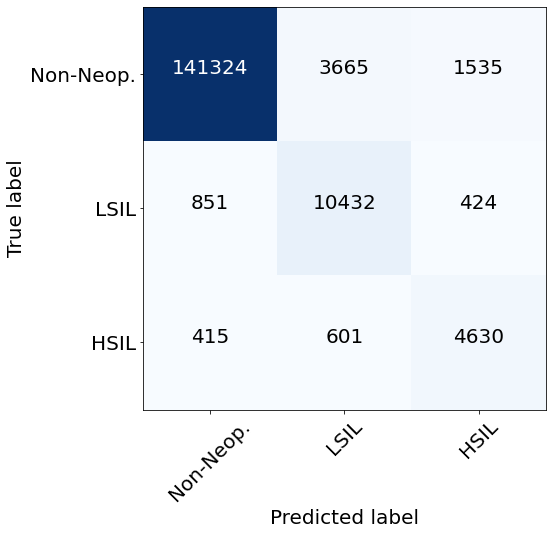

In [5]:
# Not-Normalized
cm_plt = plot_confusion_matrix(
    cm, classes, normalize=False)
if save:
    cm_plt.savefig(
        output_dir
        + project
        + "_"
        + set_data
        + "_nn-confmatrix.png",
        dpi=dpi
    )
# plt.clf()
# plt.close()

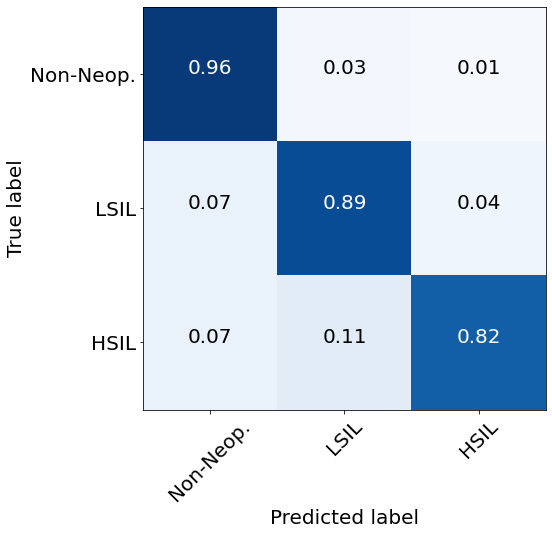

In [6]:
# Normalized
cm_plt = plot_confusion_matrix(
    cm, classes, normalize=True)
if save:
    cm_plt.savefig(
        output_dir
        + project
        + "_"
        + set_data
        + "_confmatrix.png",
        dpi=dpi
    )
# plt.clf()
# plt.close()